In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

552229     72500.0
452216     90000.0
190023     85000.0
731929     87500.0
137551    150000.0
283316     81311.5
735386    102500.0
144532     65000.0
183599     90250.0
332636     70000.0
Name: salary_year_avg, dtype: float64

<Axes: >

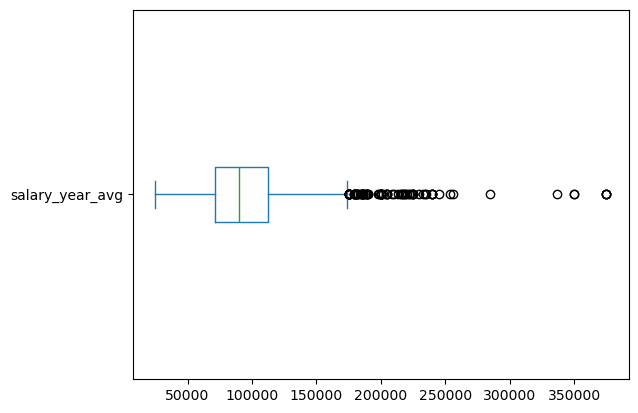

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [9]:
df_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


/var/folders/ly/n58322md2bqckw_146wsp4gw0000gn/T/ipykernel_97162/4267595591.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


{'whiskers': [<matplotlib.lines.Line2D at 0x16209cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x16209e3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16209c710>,
 'medians': [<matplotlib.lines.Line2D at 0x16209f810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1620ac1d0>,
 'means': []}

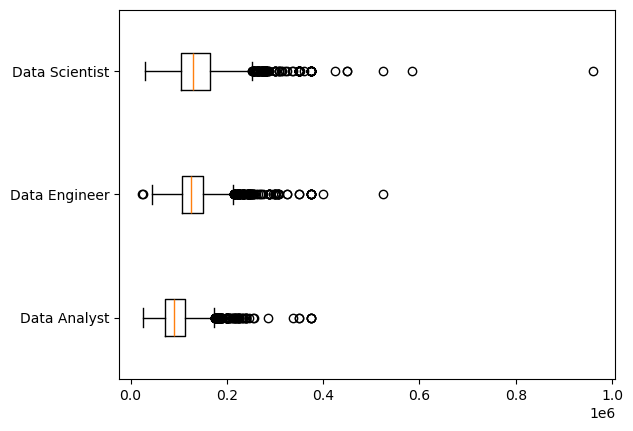

In [ ]:
df_US = df_US.dropna(subset=['salary_year_avg'])

# Creates a list of series
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

{'whiskers': [<matplotlib.lines.Line2D at 0x16211b350>,
 'caps': [<matplotlib.lines.Line2D at 0x162120710>,
 'boxes': [<matplotlib.lines.Line2D at 0x16211a990>,
 'medians': [<matplotlib.lines.Line2D at 0x162121a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1621222d0>,
 'means': []}

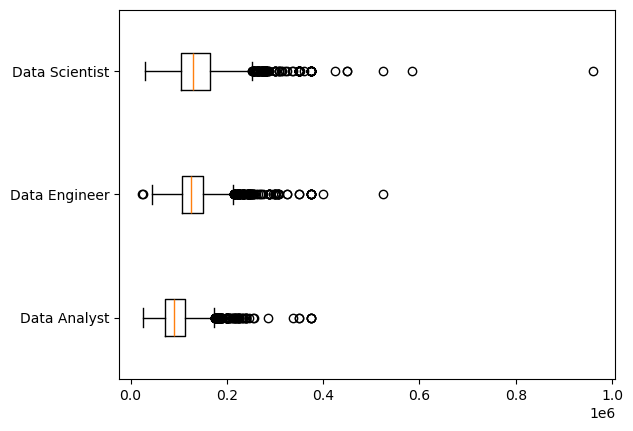

In [11]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)

In [22]:
df_US[df_US['job_title_short'] == 'Data Analyst']['salary_year_avg']

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

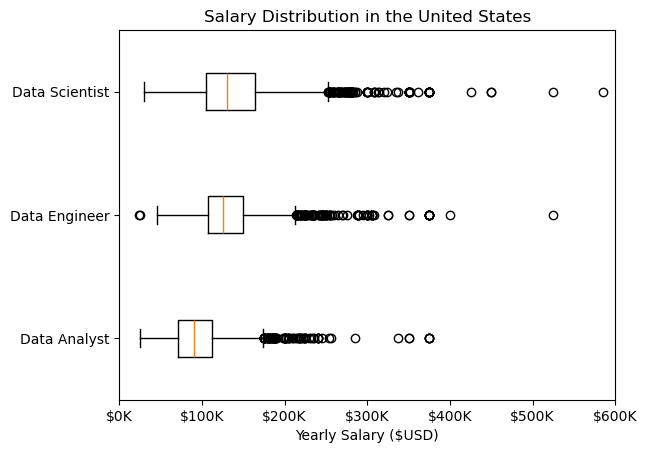

In [24]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()